## Import

In [1]:
import os
import math
import pandas as pd
import random
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
## Basic parameter
cnames = {                        
'blueviolet':           '#8A2BE2',
'brown':                '#A52A2A',
'burlywood':            '#DEB887',
'cadetblue':            '#5F9EA0',
'chocolate':            '#D2691E',
'crimson':              '#DC143C',
'cyan':                 '#00FFFF',
'darkblue':             '#00008B',
'darkcyan':             '#008B8B',
'darkolivegreen':       '#556B2F',
'darkorange':           '#FF8C00',
'darksalmon':           '#E9967A',
'darkseagreen':         '#8FBC8F',
'darkslateblue':        '#483D8B',
'darkslategray':        '#2F4F4F',
'darkturquoise':        '#00CED1',
'darkviolet':           '#9400D3',
'deeppink':             '#FF1493',
'deepskyblue':          '#00BFFF',
'dimgray':              '#696969',
'dodgerblue':           '#1E90FF',
'firebrick':            '#B22222',
'floralwhite':          '#FFFAF0',
'forestgreen':          '#228B22',
'fuchsia':              '#FF00FF',
'gainsboro':            '#DCDCDC',
'ghostwhite':           '#F8F8FF',
'gold':                 '#FFD700',
'greenyellow':          '#ADFF2F',
'honeydew':             '#F0FFF0',
'hotpink':              '#FF69B4',
'indianred':            '#CD5C5C',
'indigo':               '#4B0082',
'ivory':                '#FFFFF0',
'khaki':                '#F0E68C',
'orangered':            '#FF4500',
'orchid':               '#DA70D6'}
carr = []
for cmap in cnames.keys():                          ## color array
    carr.append(cmap)
marr = ['o-', 'x-', '^-', 's-', 'p-', '*-', 'h-']   ## marker array

## Pauli matrix

In [3]:
j = 1
h = 0.5
hbar = 1
SigmaX = np.array([[0,1],[1,0]])
SigmaY = np.array([[0,-1j],[1j,0]])
SigmaZ = np.array([[1,0],[0,-1]])
Sx = hbar/2*SigmaX
Sy = hbar/2*SigmaY
Sz = hbar/2*SigmaZ
I = np.array([[1,0],[0,1]])
#Htot = np.zeros((2**L,2**L))
#Sxtot = np.zeros((2**L,2**L))
#Sytot = np.zeros((2**L,2**L))
#Sztot = np.zeros((2**L,2**L))

#SzList = []
#SyList = []
#SxList = []


## One Site

In [4]:
E,V = la.eigh(Sx)
print(Sx @ V[0] -E[0]*V[0])
print(V[0] @ Sx @ V[0])

[0. 0.]
-0.4999999999999999


### Four Sites

In [4]:
def Hamiltonain(L,Sx,Sy,Sz,I,j,h):
    global Sxtot
    global Sytot
    global Sztot
    global SxList
    global SyList 
    global SzList  
    global Htot 

    Sxtot = np.zeros((2**L, 2**L))
    Sytot = np.zeros((2**L, 2**L))
    Sztot = np.zeros((2**L, 2**L))
    Htot = np.zeros((2**L, 2**L))
    SxList = []
    SyList = []
    SzList = []

    for k in range(L):
        x = Sx
        y = Sy
        z = Sz
        if(k == 0):
            for i in range(L-1):
                x = np.kron(x,I)
                y = np.kron(y,I)
                z = np.kron(z,I)
            SxList.append(x)
            SyList.append(y)
            SzList.append(z)
        elif(k == L-1):
            for i in range(L-1):
                x = np.kron(I,x)
                y = np.kron(I,y)
                z = np.kron(I,z)
            SxList.append(x)
            SyList.append(y)
            SzList.append(z)
        else:
            for i in range(k):
                x = np.kron(I,x)
                y = np.kron(I,y)
                z = np.kron(I,z)
            for i in range(k, L-1):
                x = np.kron(x,I)
                y = np.kron(y,I)
                z = np.kron(z,I)
            SxList.append(x)
            SyList.append(y)
            SzList.append(z)

    for i in range(L):
        if i < L-1:
            Htot = Htot - j*SxList[i] @ SxList[i+1] - h*SzList[i]
        else:
            Htot = Htot - j*SxList[i] @ SxList[0] - h*SzList[i]

    for i in range(L):
        Sxtot = Sxtot + SxList[i]
        Sytot = Sytot + SyList[i]
        Sztot = Sztot + SzList[i]
   

In [10]:
L = 4
Hamiltonain(L,Sx,Sy,Sz,I,j,h)
with np.printoptions(linewidth = 150):
    print(SxList[3])
    print(SyList[3])
    print(SzList[3])

[[0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

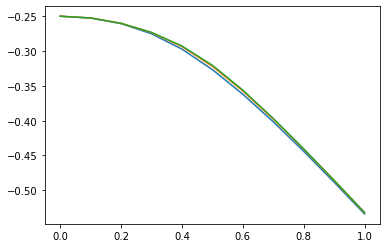

In [5]:
Llist = list(range(4,10,2))
hlist = np.linspace(0,1,11)
E = np.zeros((len(Llist),len(hlist)))

for l in range(len(Llist)):
    L = Llist[l]
    Sxtot = np.zeros((2**L,2**L))
    Sytot = np.zeros((2**L,2**L))
    Sztot = np.zeros((2**L,2**L))
    for h in range(len(hlist)):
        Hamiltonain(L,Sx,Sy,Sz,I,1,hlist[h])
        e, v = la.eigh(Htot)
        E[l,h] = e[0]/L
    plt.plot( hlist, E[l,:] )




In [25]:
Hamiltonain(4,Sx,Sy,Sz,I,1,0.5)
e,v = la.eigh(Htot)
print(v[:,0] @ Sytot @ v[:,0])


0j


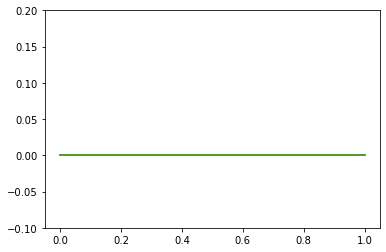

In [12]:
Llist = list(range(4,10,2))
hlist = np.linspace(0,1,11)
SxE = np.zeros((len(Llist),len(hlist)))

for l in range(len(Llist)):
    L = Llist[l]
    for h in range(len(hlist)):
        Hamiltonain(L,Sx,Sy,Sz,I,1,hlist[h])
        e, v = la.eigh(Htot)
        SxE[l,h] = v[:,0] @ SxList[0]  @ v[:,0]
    plt.plot( hlist, SxE[l,:] )
    plt.ylim(-0.1,0.2)


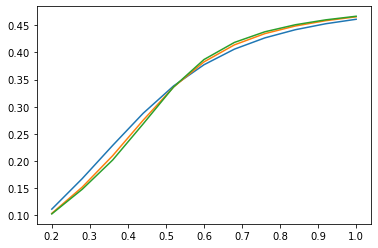

In [33]:
Llist = list(range(4,10,2))
hlist = np.linspace(0.2,1,11)
SzE = np.zeros((len(Llist),len(hlist)))

for l in range(len(Llist)):
    L = Llist[l]
    for h in range(len(hlist)):
        Hamiltonain(L,Sx,Sy,Sz,I,1,hlist[h])
        e, v = la.eigh(Htot)
        SzE[l,h] = v[:,0] @ SzList[0] @ v[:,0]
    plt.plot( hlist, SzE[l,:] )

In [20]:
Hamiltonain(4,Sx,Sy,Sz,I,1.1,0.6)
e, v = la.eigh(Htot)
#print(e)
#print(v)
print(e[0])
print(v[0])
print(e[0]*v[:,0])
print(Htot@v[:,0])

-1.5051374446884687
[-5.54696126e-01 -6.47248914e-01 -4.14152098e-01 -1.44070444e-15
  1.88595639e-17  4.10504796e-17 -2.98721565e-17  7.97579289e-18
  1.20320702e-17 -2.17648971e-17  2.84725908e-01 -2.31787132e-16
  8.21045001e-19  1.15537281e-01 -5.98875092e-17 -8.62634605e-02]
[0.83489391 0.28187232 0.28187232 0.22472817 0.28187232 0.12983836
 0.22472817 0.28187232 0.28187232 0.22472817 0.12983836 0.28187232
 0.22472817 0.28187232 0.28187232 0.83489391]
[0.83489391 0.28187232 0.28187232 0.22472817 0.28187232 0.12983836
 0.22472817 0.28187232 0.28187232 0.22472817 0.12983836 0.28187232
 0.22472817 0.28187232 0.28187232 0.83489391]


In [28]:
Sz1 = np.kron(Sz,np.kron(I,np.kron(I,I)))
Sz2 = np.kron(I,np.kron(Sz,np.kron(I,I)))
Sz3 = np.kron(I,np.kron(I,np.kron(Sz,I)))
Sz4 = np.kron(I,np.kron(I,np.kron(I,Sz)))

Sx1 = np.kron(Sx,np.kron(I,np.kron(I,I)))
Sx2 = np.kron(I,np.kron(Sx,np.kron(I,I)))
Sx3 = np.kron(I,np.kron(I,np.kron(Sx,I)))
Sx4 = np.kron(I,np.kron(I,np.kron(I,Sx)))

j = 1.1
h = 0.6

H1 = -(Sz1 @ Sz2)
H2 = -(Sz2 @ Sz3)
H3 = -(Sz3 @ Sz4)
H4 = -(Sz4 @ Sz1)
H5 = -0.5*(Sx1+Sx2+Sx3+Sx4)
HH = 0
HH = j*(-(Sz1 @ Sz2) -(Sz2 @ Sz3) -(Sz3 @ Sz4) -(Sz4 @ Sz1)) - h*(Sx1+Sx2+Sx3+Sx4) 
E,V = la.eigh(HH)
print(E)

[-1.50513744e+00 -1.36394103e+00 -6.20130045e-01 -6.00000000e-01
 -6.00000000e-01 -2.63941030e-01 -1.38825433e-16 -6.07778578e-17
  2.68137861e-17  8.98252272e-17  2.63941030e-01  6.00000000e-01
  6.00000000e-01  6.20130045e-01  1.36394103e+00  1.50513744e+00]
